# Introcution

This file is used to create the B-Dataset. Originally this was done in a different file, but was migrated here due to clarity issues. Here, mostly productive functions are going to be applied, meaning that the necessary analysis can be found in files within the analysis folder. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
# Variables
ROOT_PATH = os.path.abspath("../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preparation/prepped_files")
OUTPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing")

In [15]:
data = pd.read_pickle(os.path.join(INPUT_FOLDER, "07_integration.pkl"))
data

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5627321,-8.0,-8.0,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-11
5622325,-8.0,-7.0,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,333
5626430,-11.0,-9.0,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,11
5625623,-11.0,-9.0,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-20
11292052,-11.0,-6.0,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-26
11290999,-11.0,-5.0,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290527,-11.0,-11.0,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-33


## Target Variable
The target variable is to be created. As found in the [analysis/classification_target_distribution.ipynb]() file. I chose the FAA fitting version that classifies flights within -15 minutes and +15 minutes delay as on time while being too early or too late when arriving before or after these limits respectively

In [16]:
delays = data.ARR_DELAY_MINS.to_numpy()

# Formulating limits and labels of binning
bins = [delays.min()-1,-15,15,delays.max()+1]
labels=["Early", "On Time", "Late"]

# Creating dict for transition from cat to numerical
trans_dict = {}
for count, label in enumerate(labels):
    trans_dict.update({
        label : count
    })

# Do the binning
binned = pd.cut(data.ARR_DELAY_MINS, bins, labels=labels, include_lowest=True)

# Insert correct categorical number
data["ARR_DELAY_CATS"] = binned.apply(lambda x: trans_dict.get(x))
data = data.drop(["ARR_DELAY_MINS"], axis="columns")
data

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_CATS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5627321,-8.0,-8.0,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5622325,-8.0,-7.0,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,2
5626430,-11.0,-9.0,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5625623,-11.0,-9.0,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11292052,-11.0,-6.0,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290999,-11.0,-5.0,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11290527,-11.0,-11.0,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0


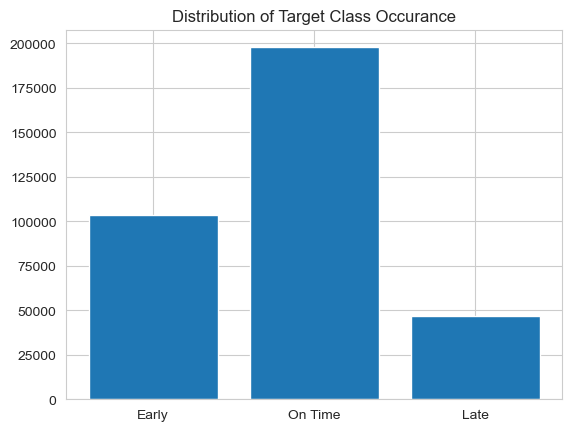

In [17]:
fig, ax = plt.subplots()

count_dict = data.ARR_DELAY_CATS.value_counts().to_dict()
count_dict = dict(sorted(count_dict.items()))
X = ["Early", "On Time", "Late"]
Y = count_dict.values()

ax.set_title("Distribution of Target Class Occurance")
ax.bar(X,Y)
plt.show()

## Dropping Columns
Some columns were not introduced when the B-file was created. These and originally intended deleted columns are now deleted

In [18]:
data.drop(["MEDIAN_CARR_DELAY(MINS)", "MEDIAN_ORIGIN_DELAY(MINS)", "PARKING_AREA(SQM)", "ALTIMETER(PA)"], axis="columns")

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,NR_ENGINES,APPROACH_SPEED(KMH),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_CATS
5626534,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,2,261.132,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5627321,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,2,233.352,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5622325,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,2,259.280,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,2
5626430,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,2,255.576,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5625623,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,2,257.428,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,2,261.132,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11292052,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,2,261.132,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290999,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,2,261.132,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11290527,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,2,261.132,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
data
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]
#Test-Train-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
X_train

Shape of X_train: (278512, 45)
Shape of y_train: (278512, 1)
Shape of X_test: (69628, 45)
Shape of y_test: (69628, 1)


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
7765533,-11.0,-14.0,5,153,1223.09840,48,0.000000,1.000000,0.246153,-0.969231,...,0,0,0,0,0,0.0,3.0,0.0,3.0,3.0
8217469,-11.0,-13.0,-1,132,1195.73962,78,0.000000,1.000000,-0.713250,-0.700909,...,0,0,0,0,0,3.0,1.0,3.0,1.0,3.0
7187414,-11.0,-14.0,-8,244,2489.64898,52,-0.974928,-0.222521,-0.970296,-0.241922,...,0,0,0,0,0,0.0,0.0,3.0,3.0,2.0
10430119,-11.0,-7.0,-4,83,683.96950,62,-0.974928,-0.222521,0.370557,-0.928810,...,0,0,0,0,0,0.0,0.0,3.0,0.0,2.0
8721313,-11.0,-8.0,3,125,935.02654,70,0.974928,-0.222521,-0.857167,0.515038,...,0,0,0,0,0,3.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652310,-11.0,-5.0,-3,265,3133.38498,79,-0.433884,-0.900969,-0.932008,0.362438,...,0,0,0,0,0,0.0,2.0,0.0,0.0,3.0
5874586,-11.0,-11.0,-2,189,1522.43564,81,0.974928,-0.222521,-0.955020,0.296542,...,0,0,2,2,0,0.0,0.0,3.0,0.0,3.0
6118023,-11.0,-8.0,58,123,1176.42754,54,-0.974928,-0.222521,0.480989,-0.876727,...,0,0,0,0,0,0.0,0.0,0.0,3.0,2.0
7795073,-11.0,-15.0,-7,145,1200.56764,50,0.781831,0.623490,-0.994056,0.108867,...,0,0,2,0,0,3.0,1.0,3.0,3.0,3.0


In [20]:
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

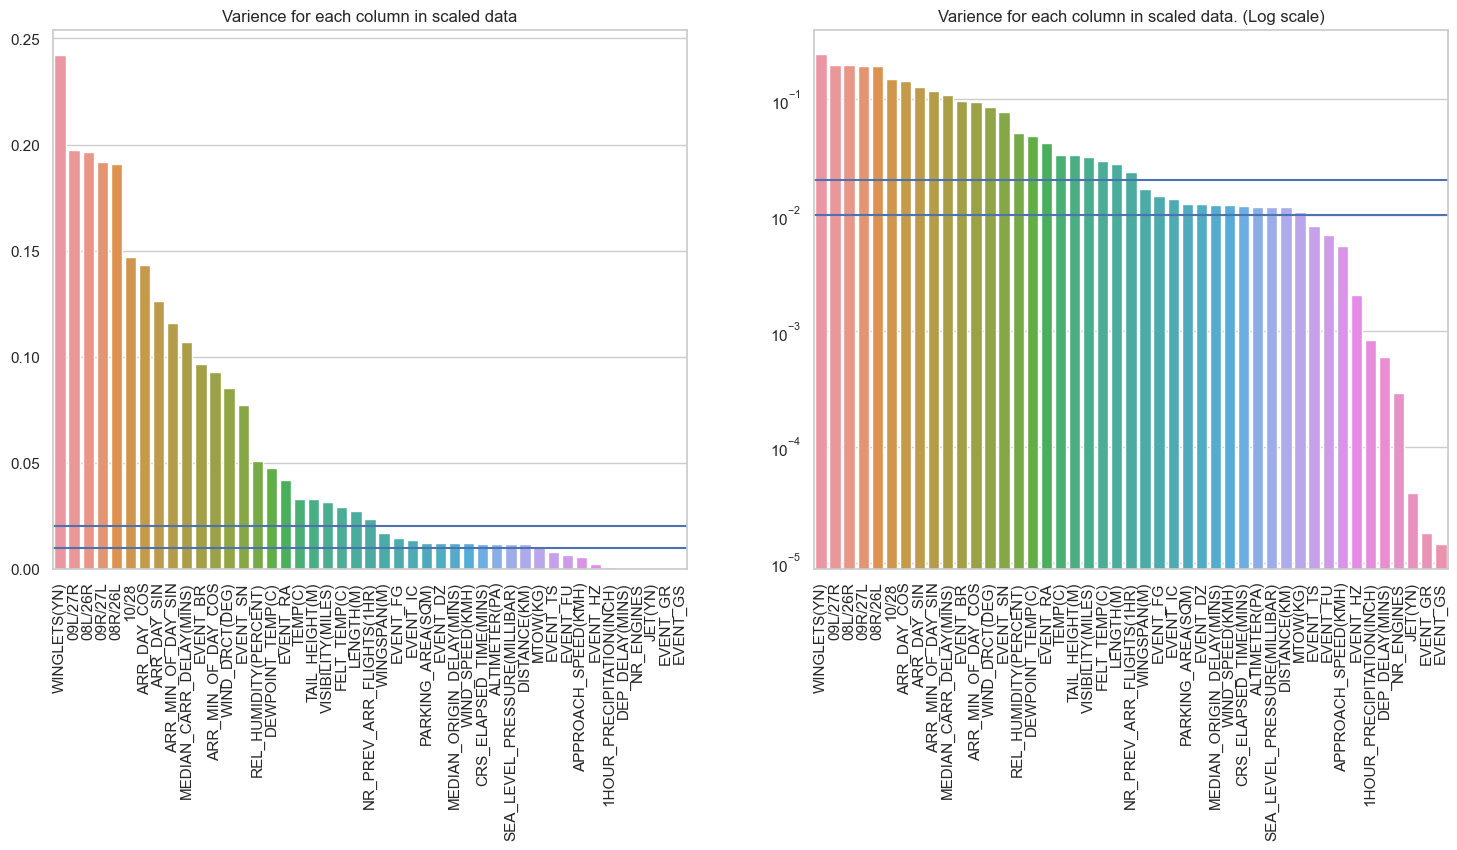

In [22]:
fig, axes = plt.subplots(1,2,figsize=(18,7))
var = pd.DataFrame(X_train_minmax, columns=X_train.columns).var().sort_values(ascending=False)
sns.set(style="whitegrid")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[0].set_title("Varience for each column in scaled data")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[1].set_yscale("log")
axes[1].set_title("Varience for each column in scaled data. (Log scale)")
axes[0].axhline(0.01)
axes[1].axhline(0.01)
axes[0].axhline(0.02)
axes[1].axhline(0.02)

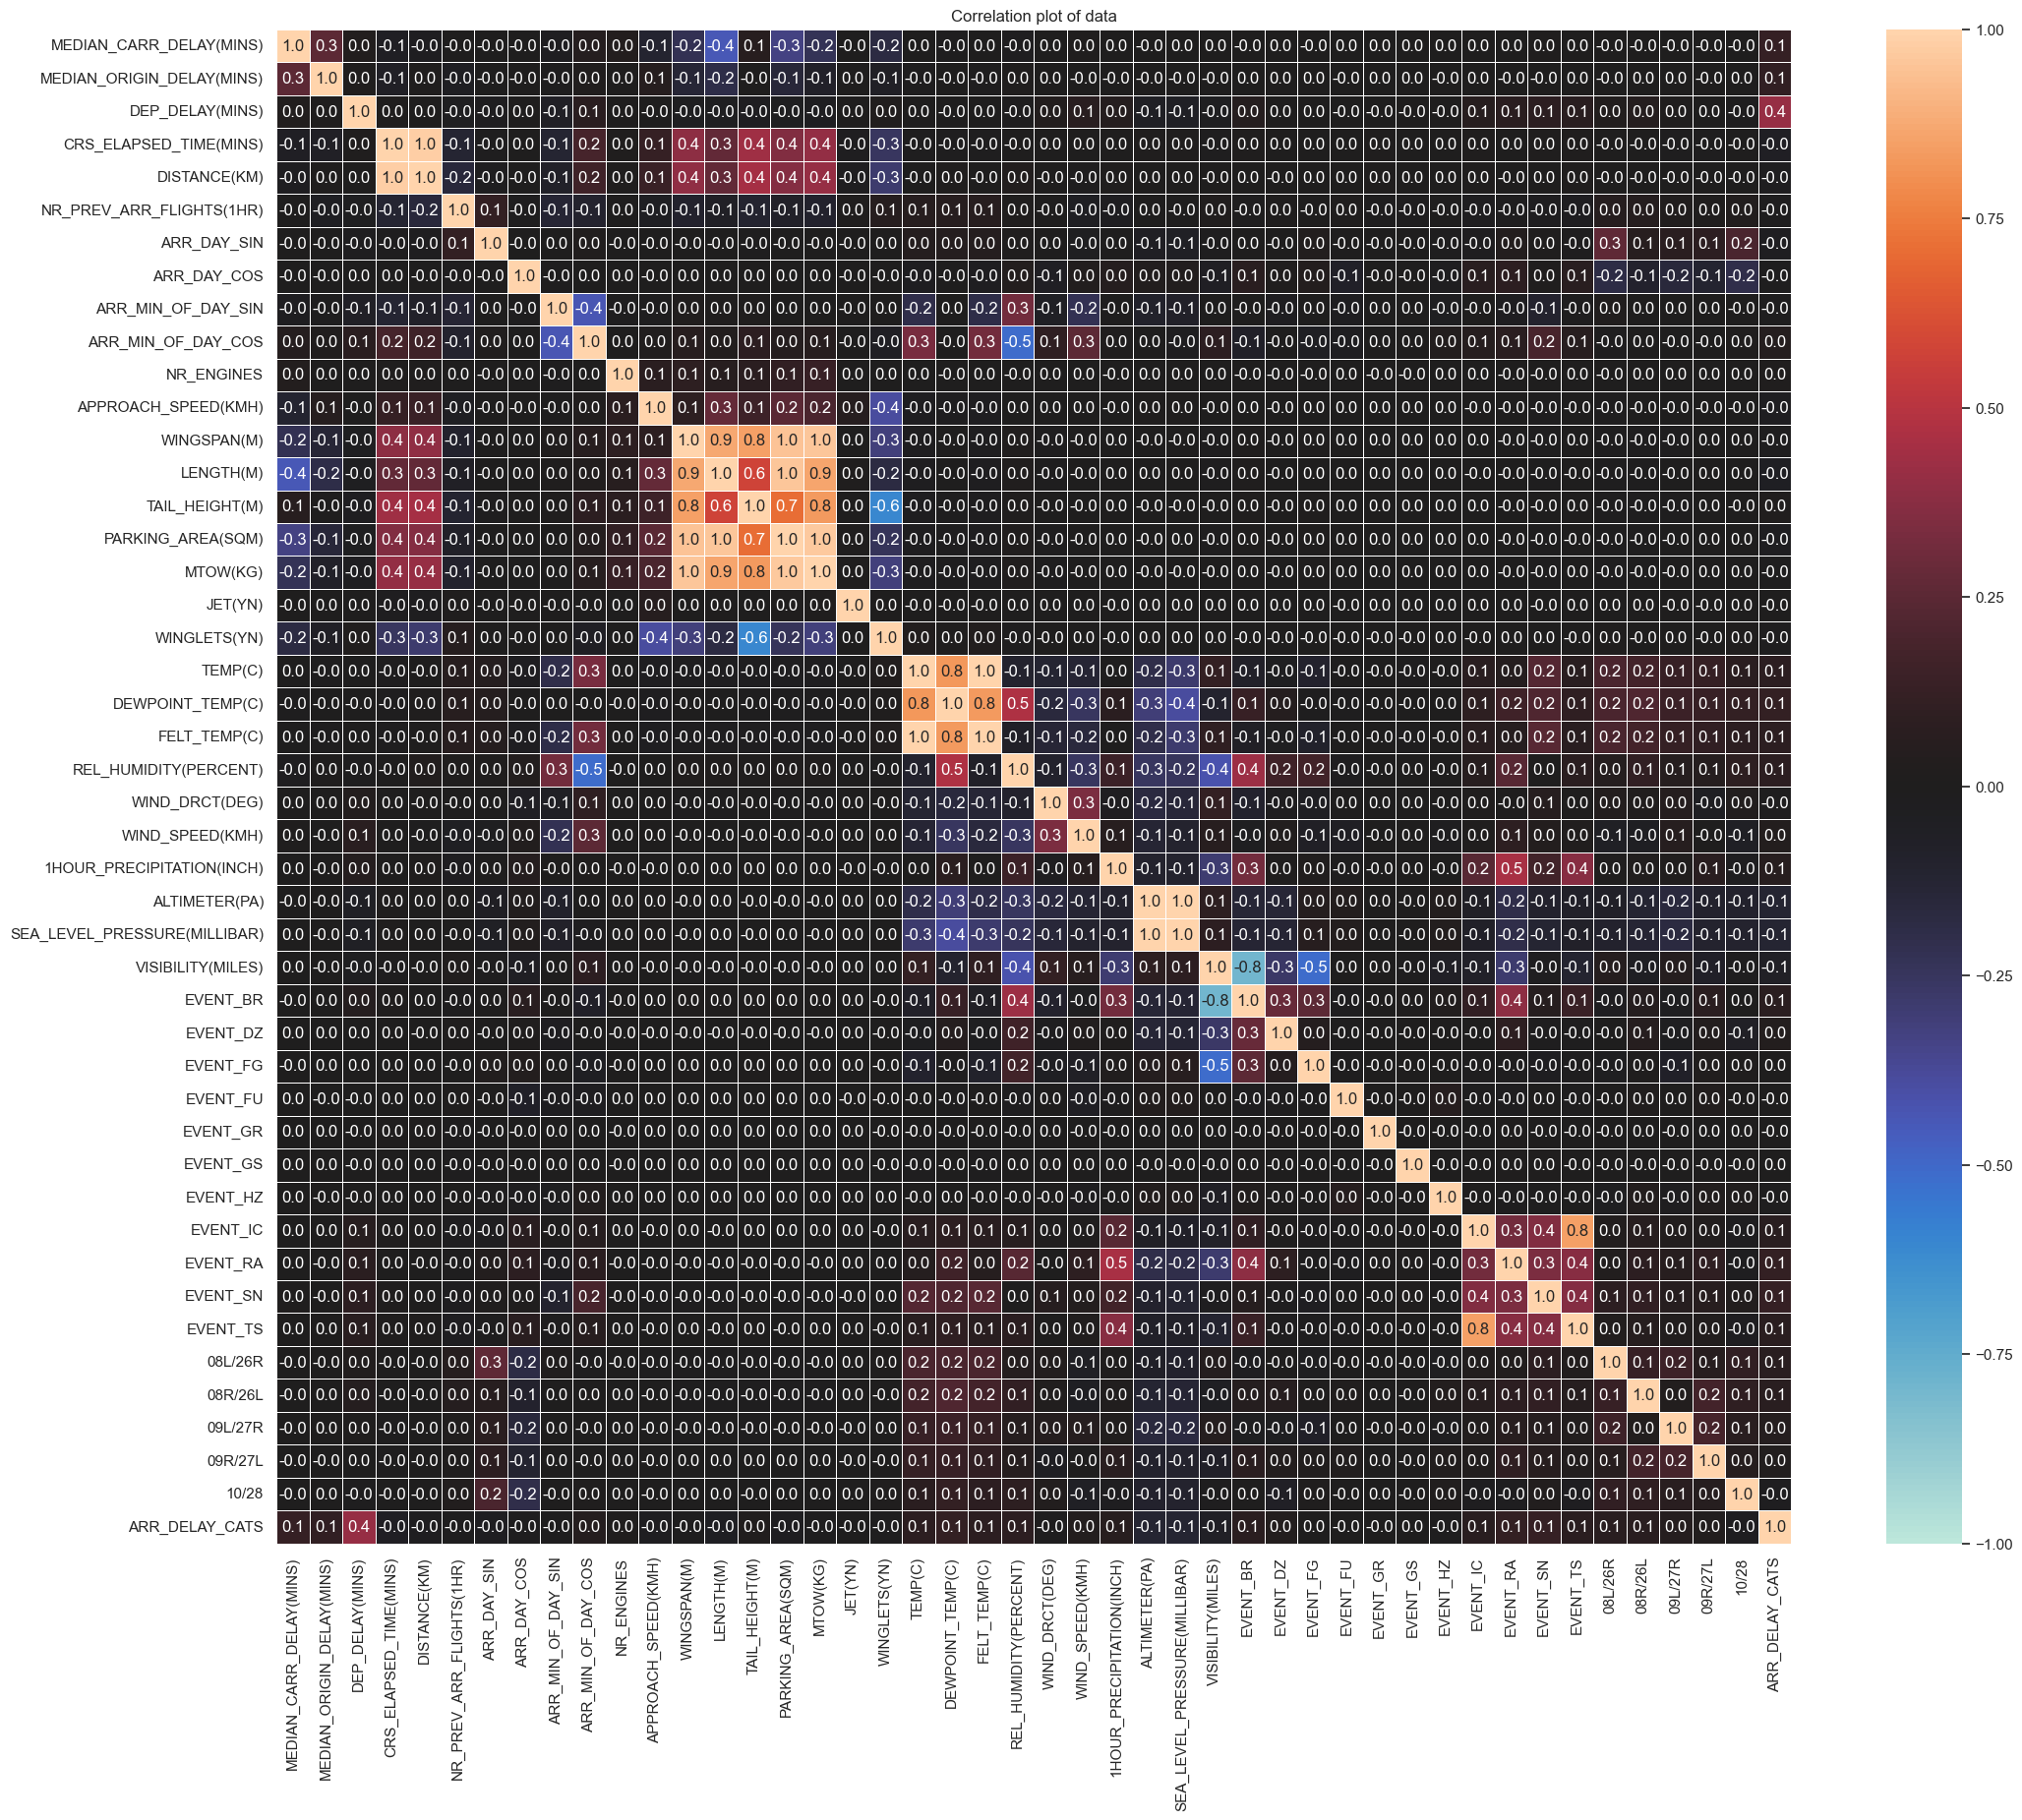

In [24]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
g = sns.heatmap(pd.DataFrame(np.hstack((X_train_minmax,y_train)), columns=list(X_train.columns) + list(y_train.columns)).corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".1f")